In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## A. Discretize the wave equation and implement in a computer program


The one-dimensional wave equation:

$$
\frac{\partial^2 \Psi}{\partial t^2} = c^2 \frac{\partial^2 \Psi}{\partial x^2}
$$



The equation is solved numerically using finite differences. The spatial domain is discretized into \( N \) intervals with step size:

$$
\Delta x = \frac{L}{N}, \quad \Delta t
$$

We define:

$$
\Psi_i^n \approx \Psi(x_i, t_n), \quad x_i = i \Delta x, \quad t_n = n \Delta t
$$

Using central differences:

$$
\frac{\partial^2 \Psi}{\partial x^2} \approx \frac{\Psi_{i+1}^n - 2\Psi_i^n + \Psi_{i-1}^n}{\Delta x^2}
$$

$$
\frac{\partial^2 \Psi}{\partial t^2} \approx \frac{\Psi_i^{n+1} - 2\Psi_i^n + \Psi_i^{n-1}}{\Delta t^2}
$$

Substituting into the wave equation:

$$
\Psi_i^{n+1} = 2\Psi_i^n - \Psi_i^{n-1} + r^2 (\Psi_{i+1}^n - 2\Psi_i^n + \Psi_{i-1}^n)
$$

where:

$$
r = \frac{c \Delta t}{\Delta x}
$$

with boundary conditions:

$$
\Psi_0^n = 0, \quad \Psi_N^n = 0
$$

Initial condition:

$$
\Psi_i^0 =
\begin{cases}
\sin(2\pi x_i), & \text{Case 1} \\
\sin(5\pi x_i), & \text{Case 2} \\
\sin(5\pi x_i), & \text{if } \frac{1}{5} < x_i < \frac{2}{5}, \text{ else } 0, \quad \text{Case 3}
\end{cases}
$$

Since the string is initially at rest:

$$
\Psi_i^1 = \Psi_i^0
$$

For interior points:

$$
i = 1, \dots, N-1
$$

the numerical scheme is:

$$
\Psi_i^{n+1} = 2\Psi_i^n - \Psi_i^{n-1} + r^2 (\Psi_{i+1}^n - 2\Psi_i^n + \Psi_{i-1}^n)
$$

with boundary conditions:

$$
\Psi_0^n = 0, \quad \Psi_N^n = 0
$$


In [26]:
def wave_equation_solver(L, N, c, T, dt, u0):
    """Solves the 1D wave equation using finite difference method."""
    
    dx = L / N
    r = c * dt / dx  # Courant number
    if r > 1:
        raise ValueError(f"Unstable: Courant number r={r:.2f} > 1.")

    Nt = int(T / dt)  # Number of time steps
    x = np.linspace(0, L, N+1)
    
    # Initialize solution grid
    Psi = np.zeros((N+1, Nt+1))
    Psi[:, 0] = u0
    Psi[:, 1] = u0  # Initial velocity = 0

    # Time stepping loop
    for n in range(1, Nt):
        Psi[1:N, n+1] = 2 * Psi[1:N, n] - Psi[1:N, n-1] + r**2 * (Psi[2:N+1, n] - 2 * Psi[1:N, n] + Psi[0:N-1, n])

    return x, Psi  # Returns the spatial points and full solution matrix


## B. Implement the time stepping.

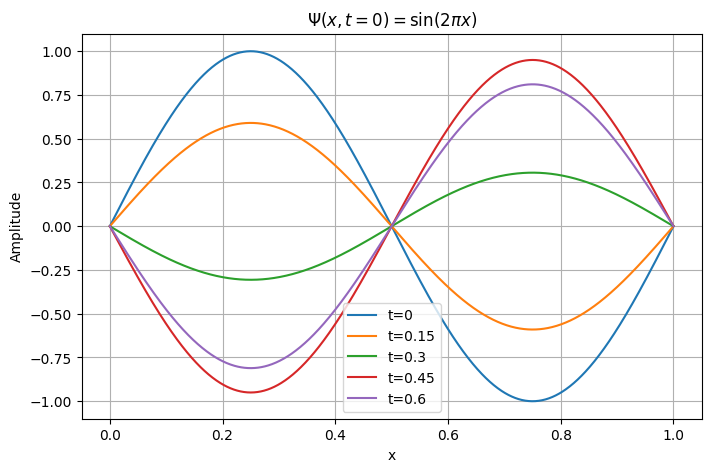

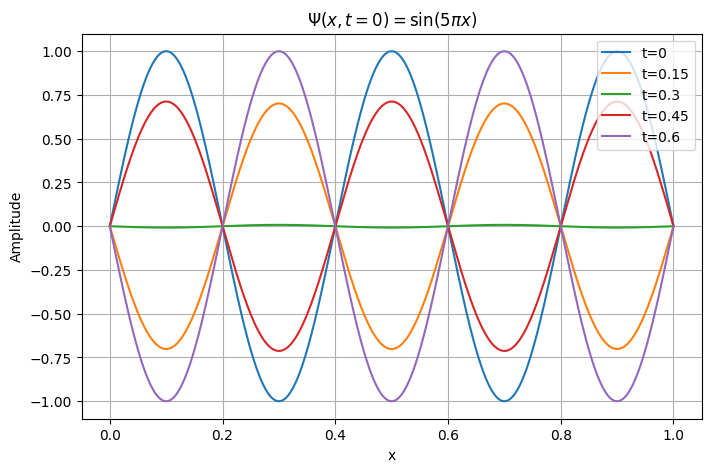

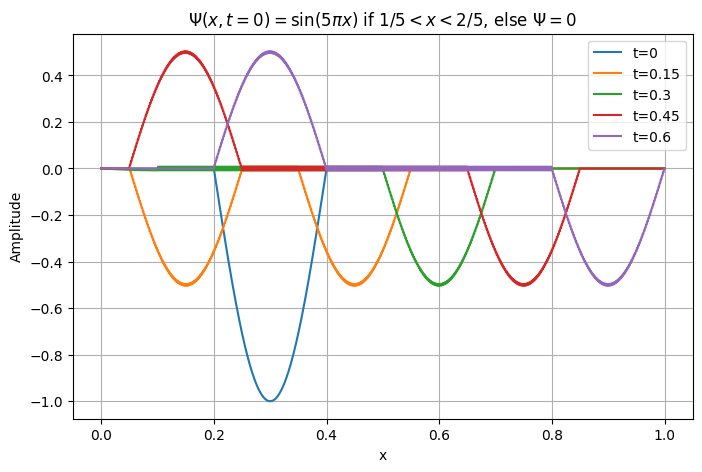

In [62]:
# Set parameters
L, N, c, T, dt = 1.0, 1000, 1.0, 2.0, 0.001

# Define initial conditions
x_values = np.linspace(0, L, N+1)
u0_case1 = np.sin(2 * np.pi * x_values)
u0_case2 = np.sin(5 * np.pi * x_values)
u0_case3 = np.where((x_values > 1/5) & (x_values < 2/5), np.sin(5 * np.pi * x_values), 0)

# Solve for all three initial conditions
x, Psi_case1 = wave_equation_solver(L, N, c, T, dt, u0_case1)
x, Psi_case2 = wave_equation_solver(L, N, c, T, dt, u0_case2)
x, Psi_case3 = wave_equation_solver(L, N, c, T, dt, u0_case3)

# Select specific time steps for plotting
time_indices = [0, int(0.15 / dt), int(0.3 / dt), int(0.45 / dt), int(0.6 / dt)]
time_labels = ["t=0", "t=0.15", "t=0.3", "t=0.45", "t=0.6"]

# Titles for each case
titles = [
    r'$\Psi(x, t=0) = \sin(2\pi x)$',
    r'$\Psi(x, t=0) = \sin(5\pi x)$',
    r'$\Psi(x, t=0) = \sin(5\pi x)$ if $1/5<x<2/5$, else $\Psi=0$'
]

# Store results for iteration
Psi_results = [Psi_case1, Psi_case2, Psi_case3]

# Plot each case separately
for i in range(3):
    plt.figure(figsize=(8, 5))
    plt.title(titles[i])
    plt.xlabel("x")
    plt.ylabel("Amplitude")
    for idx, label in zip(time_indices, time_labels):
        plt.plot(x, Psi_results[i][:, idx], label=label)
    plt.legend()
    plt.grid()
    plt.show()
